In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as pe
import plotly.graph_objects as pg
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/Credit_Score_Classification.csv')
data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [3]:
#Check the number of empty cells in each column
data.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [12]:
#Calculate the percentage of missing data per column
missing_cols= pd.DataFrame({'feature': data.columns, 'missing': [i for i in data.isnull().sum()], 'Perc missing': [i for i in ((data.isnull().sum()/ len(data) )* 100).round(2)]})
missing_cols

,feature,missing,Perc missing
0,ID,0,0.0
1,Customer_ID,0,0.0
2,Month,0,0.0
3,Name,0,0.0
4,Age,0,0.0
5,SSN,0,0.0
6,Occupation,0,0.0
7,Annual_Income,0,0.0
8,Monthly_Inhand_Salary,0,0.0
9,Num_Bank_Accounts,0,0.0


In [5]:
#Check the data type of each column
data.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [9]:
#Sort the Columns into categorical or numerical type and make correction when needed
categorical = data.select_dtypes(include = ['category', 'object'])
numerical = data.select_dtypes(include = 'number')

print('Numerical Datasets')
display(numerical.head())
print(f'\n\nCategorical Dataset')
display(categorical.head())

Numerical Datasets


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,23,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,809.98,26.822620,49.574949,80.415295,312.494089
1,23,19114.12,NaN,3,4,3,4,-1,NaN,11.27,4.0,809.98,31.944960,49.574949,118.280222,284.629162
2,-500,19114.12,NaN,3,4,3,4,3,7.0,NaN,4.0,809.98,28.609352,49.574949,81.699521,331.209863
3,23,19114.12,NaN,3,4,3,4,5,4.0,6.27,4.0,809.98,31.377862,49.574949,199.458074,223.451310
4,23,19114.12,1824.843333,3,4,3,4,6,NaN,11.27,4.0,809.98,24.797347,49.574949,41.420153,341.489231




Categorical Dataset


,ID,Customer_ID,Month,Name,SSN,Occupation,Type_of_Loan,Credit_Mix,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",_,22 Years and 1 Months,No,High_spent_Small_value_payments,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,NaN,No,Low_spent_Large_value_payments,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,22 Years and 3 Months,No,Low_spent_Medium_value_payments,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,22 Years and 4 Months,No,Low_spent_Small_value_payments,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,22 Years and 5 Months,No,High_spent_Medium_value_payments,Good


In [7]:
#Take sample from each column
data['Annual_Income'].sample(200).values

array(['71875.28', '103284.84_', '72886.08', '69014.48', '58208.24',
       '35730.44', '105816.45', '14058.75', '18579.36', '47504.49',
       '15150.72', '36029.3', '10287.56', '63433.7', '69212.0',
       '56183.79', '19194.75', '17725.57', '8165.37', '66553.95000000001',
       '40146.78', '124183.56_', '19375.76', '29823.91', '100681.41',
       '30269.71', '33063.59', '16285.675', '17030.26_', '140135.24',
       '22119.355', '18949.48', '170391.52', '24995.92', '36136.49',
       '55835.7', '69601.24', '68552.32', '8990.5', '36849.5_',
       '17147.215', '58871.28', '57652.54', '9481.025', '39280.52',
       '64720.9', '14780.71', '92699.31', '152796.76', '110603.94',
       '20005.22', '132082.16999999998', '20501.67', '71169.3',
       '28517.53', '39593.77', '34039.54', '32438.59', '73052.94',
       '16287.14', '75488.16', '7807.285', '19386.02', '60422.06',
       '37840.48', '107334.88', '28866.94', '12285.14',
       '100555.86000000002', '16372.05', '26347.02', '41073.2

In [8]:
#Write a formula to remove unwanted symbols and signs in the data and to change the data type.
#Allows you to properly sort the data into category and numerical data
def Clean_Convert(data, column_name):
    # Remove underscores and convert to numeric
    data[column_name] = data[column_name].str.replace('_', '')
    data[column_name] = pd.to_numeric(data[column_name], errors='coerce')


Clean_Convert(data, 'Age')
Clean_Convert(data, 'Annual_Income')
Clean_Convert(data, 'Num_of_Loan')
Clean_Convert(data, 'Num_of_Delayed_Payment')
Clean_Convert(data, 'Changed_Credit_Limit')
Clean_Convert(data, 'Outstanding_Debt')
Clean_Convert(data, 'Amount_invested_monthly')
Clean_Convert(data, 'Monthly_Balance')




In [10]:
#To fill in missing rows using mode for categorical data and mean for numerical data
for i in data.columns:
    if ((data[i].isnull().sum()/ len(data)) * 100) > 30:
        data.drop(i, axis = 1, inplace = True)
    elif data[i].dtypes == 'O':
        data[i].fillna(data[i].mode()[0], inplace = True)
    else:
        data[i].fillna(data[i].median(), inplace = True)

data.isnull().sum().sort_values(ascending = False).head()

ID                         0
Customer_ID                0
Monthly_Balance            0
Payment_Behaviour          0
Amount_invested_monthly    0
dtype: int64

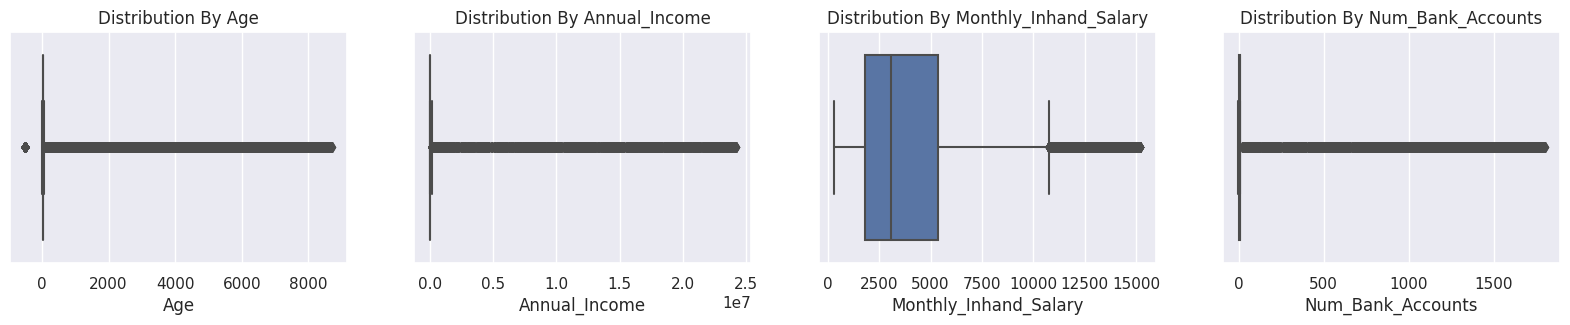

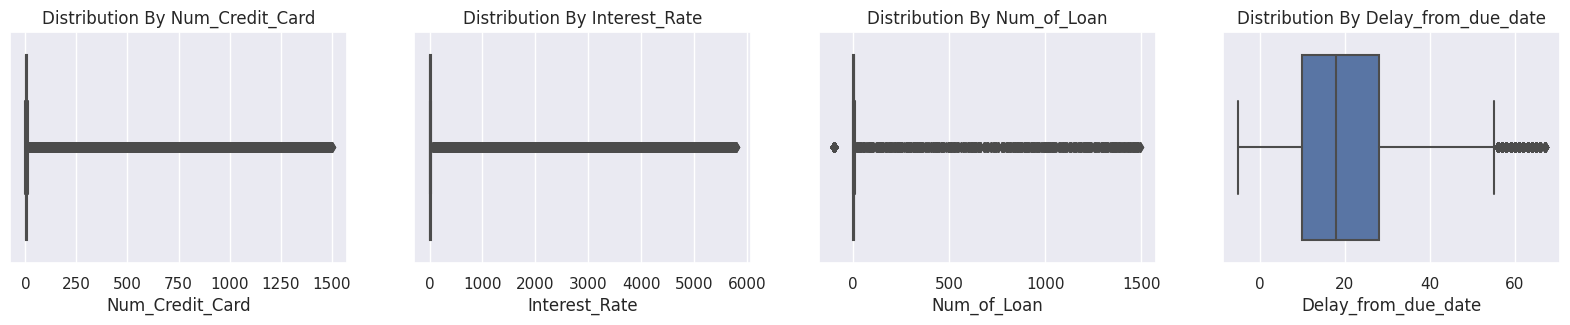

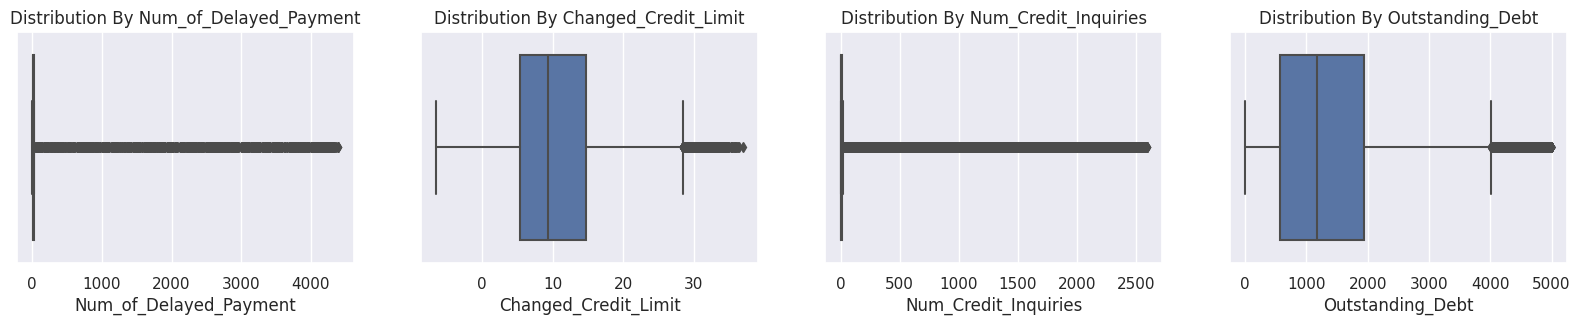

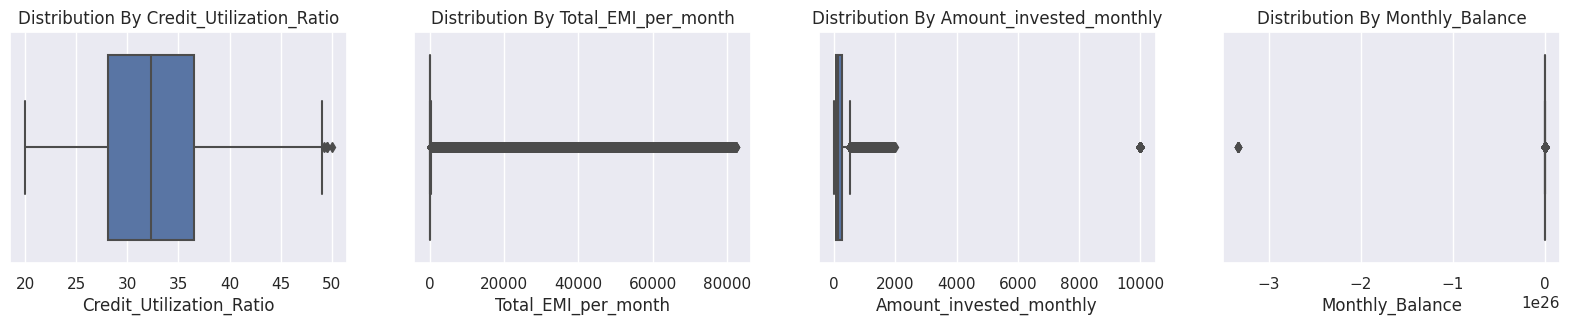

In [11]:
#Plotting Outliers for all numerical data
def plotter(dataframe, a,b,c,d):
    sns.set(style = 'darkgrid')
    plt.figure(figsize = (20, 3))
    plt.subplot(1, 4, 1)
    sns.boxplot(x = data[a])
    plt.title(f'Distribution By {a}')

    plt.subplot(1, 4, 2)
    sns.boxplot(x = data[b])
    plt.title(f'Distribution By {b}')

    plt.subplot(1, 4, 3)
    sns.boxplot(x = data[c])
    plt.title(f'Distribution By {c}')

    plt.subplot(1, 4, 4)
    sns.boxplot(x = data[d])
    plt.title(f'Distribution By {d}')




    plt.show()

plotter(data, 'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts')
plotter(data, 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date' )
plotter(data, 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt' )
plotter(data, 'Credit_Utilization_Ratio',	'Total_EMI_per_month',	'Amount_invested_monthly',	'Monthly_Balance' )

In [13]:
#Remove the outlier from the numerical data
def outlierRemover(dataframe):
    feature_list, lowerThresh_list, upperThresh_list = [], [], []

    for j,i in enumerate(dataframe.columns):
        Q1 = dataframe[i].describe()[4]
        Q3 = dataframe[i].describe()[6]
        IQR = Q3 - Q1
        lowerThreshold = Q1 - 1.5 * IQR
        upperThreshold = Q3 + 1.5 *  IQR

        feature_list.append(dataframe.columns[j])
        lowerThresh_list.append(lowerThreshold)
        upperThresh_list.append(upperThreshold)

        recorder = pd.DataFrame({'feature': feature_list, 'lowerThreshold': lowerThresh_list, 'upperThreshold': upperThresh_list})

        dataframe = dataframe.loc[(dataframe[i] >= lowerThreshold) & (dataframe[i] <= upperThreshold)]

    return dataframe

New_data = outlierRemover(numerical)

In [14]:
New_data['Annual_Income'].sample(200).values

array([ 80673.3  ,  15349.54 ,  29968.56 ,  33777.11 ,  13139.385,
        60422.06 ,  65668.78 ,  57872.7  ,  42843.65 ,  97791.42 ,
        19543.05 ,  16421.94 ,  36311.46 ,  12303.09 ,   9547.825,
        30536.26 ,  60116.7  ,  31227.35 ,  87520.66 ,  29146.6  ,
        59641.5  ,  20833.08 ,  47557.02 ,  28056.94 ,  34315.71 ,
       122658.64 ,  31380.64 ,  76353.4  ,  19796.08 ,  16474.845,
        60574.48 , 107797.8  ,  18084.08 ,  68056.4  ,  47634.45 ,
        73517.54 ,   9290.25 ,  62773.2  ,  29353.04 ,   8763.22 ,
        47984.19 ,  36408.04 ,  37240.22 ,  75291.12 ,  84358.5  ,
        14791.06 ,  33606.82 ,  63597.74 ,  81094.96 , 100887.72 ,
        57626.34 , 102594.9  ,  29283.91 ,  32853.06 ,  18096.155,
        88905.   ,  22265.03 ,  79716.94 ,  53387.88 ,  34763.33 ,
        37993.12 ,  62276.37 ,  17570.58 ,  77923.   , 106077.6  ,
        18028.98 ,  36035.32 , 114007.88 ,  17559.88 ,  66567.32 ,
        92300.01 ,  57101.1  ,  97612.14 ,  17097.565,  43581.

In [15]:
New_data

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,23,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,809.98,26.822620,49.574949,80.415295,312.494089
6,23,19114.12,1824.843333,3,4,3,4,3,8.0,11.27,4.0,809.98,22.537593,49.574949,178.344067,244.565317
7,23,19114.12,1824.843333,3,4,3,4,3,6.0,11.27,4.0,809.98,23.933795,49.574949,24.785217,358.124168
8,28,34847.84,3037.986667,2,4,6,1,3,4.0,5.42,2.0,605.03,24.464031,18.816215,104.291825,470.690627
9,28,34847.84,3037.986667,2,4,6,1,7,1.0,7.42,2.0,605.03,38.550848,18.816215,40.391238,484.591214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98285,32,28796.82,2378.735000,6,6,21,5,30,23.0,2.78,8.0,2382.35,25.562788,82.235220,59.386080,336.252200
98286,32,28796.82,2378.735000,6,6,21,5,30,23.0,2.78,8.0,2382.35,22.816357,82.235220,109.744514,325.893766
98295,29,34599.94,2942.328333,7,6,3,0,22,8.0,3.45,1.0,942.59,33.128609,0.000000,165.397552,388.835282
98299,38,41015.55,3152.962500,0,4,4,1,9,1.0,1.58,2.0,599.40,31.936092,25.671257,387.541439,192.083554


In [16]:
categorical

,ID,Customer_ID,Month,Name,SSN,Occupation,Type_of_Loan,Credit_Mix,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",_,22 Years and 1 Months,No,High_spent_Small_value_payments,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,NaN,No,Low_spent_Large_value_payments,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,22 Years and 3 Months,No,Low_spent_Medium_value_payments,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,22 Years and 4 Months,No,Low_spent_Small_value_payments,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,22 Years and 5 Months,No,High_spent_Medium_value_payments,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,078-73-5990,Mechanic,"Auto Loan, and Student Loan",_,31 Years and 6 Months,No,High_spent_Large_value_payments,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,078-73-5990,Mechanic,"Auto Loan, and Student Loan",_,31 Years and 7 Months,No,High_spent_Medium_value_payments,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,078-73-5990,Mechanic,"Auto Loan, and Student Loan",Good,31 Years and 8 Months,No,High_spent_Large_value_payments,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,078-73-5990,Mechanic,"Auto Loan, and Student Loan",Good,31 Years and 9 Months,No,Low_spent_Large_value_payments,Standard


In [17]:
#Join the New_Data and the categorical data to get your data

categorical_data = categorical.reset_index(drop=True)
numerical_data = New_data.reset_index(drop=True)

# This code ensures that only rows with matching indices are kept in the categorical dataset
categorical_data = categorical_data[categorical_data.index.isin(numerical_data.index)]

# Concatenate the datasets along the columns axis
Data = pd.concat([categorical_data, numerical_data], axis=1)
Data

# The merged_data DataFrame now contains both categorical and numerical data
# in the original order with rows from categorical_data that don't correspond to New_data dropped.

,ID,Customer_ID,Month,Name,SSN,Occupation,Type_of_Loan,Credit_Mix,Credit_History_Age,Payment_of_Min_Amount,...,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,0x1602,CUS_0xd40,January,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",_,22 Years and 1 Months,No,...,4,3,7.0,11.27,4.0,809.98,26.822620,49.574949,80.415295,312.494089
1,0x1603,CUS_0xd40,February,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,NaN,No,...,4,3,8.0,11.27,4.0,809.98,22.537593,49.574949,178.344067,244.565317
2,0x1604,CUS_0xd40,March,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,22 Years and 3 Months,No,...,4,3,6.0,11.27,4.0,809.98,23.933795,49.574949,24.785217,358.124168
3,0x1605,CUS_0xd40,April,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,22 Years and 4 Months,No,...,1,3,4.0,5.42,2.0,605.03,24.464031,18.816215,104.291825,470.690627
4,0x1606,CUS_0xd40,May,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,22 Years and 5 Months,No,...,1,7,1.0,7.42,2.0,605.03,38.550848,18.816215,40.391238,484.591214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40339,0x1025d,CUS_0x7df0,April,Mikolajczakc,575-37-4253,Doctor,Personal Loan,_,15 Years and 7 Months,No,...,5,30,23.0,2.78,8.0,2382.35,25.562788,82.235220,59.386080,336.252200
40340,0x1025e,CUS_0x7df0,May,Mikolajczakc,575-37-4253,Doctor,Personal Loan,Good,15 Years and 8 Months,No,...,5,30,23.0,2.78,8.0,2382.35,22.816357,82.235220,109.744514,325.893766
40341,0x1025f,CUS_0x7df0,June,Mikolajczakc,575-37-4253,Doctor,Personal Loan,_,15 Years and 9 Months,NM,...,0,22,8.0,3.45,1.0,942.59,33.128609,0.000000,165.397552,388.835282
40342,0x10260,CUS_0x7df0,July,Mikolajczakc,575-37-4253,Doctor,Personal Loan,Good,15 Years and 10 Months,No,...,1,9,1.0,1.58,2.0,599.40,31.936092,25.671257,387.541439,192.083554


In [18]:
#Check for any duplicates and remove if necessary
#duplicate_rows = Data.duplicated().sum()
Clean_Data = Data.drop_duplicates()
Clean_Data

,ID,Customer_ID,Month,Name,SSN,Occupation,Type_of_Loan,Credit_Mix,Credit_History_Age,Payment_of_Min_Amount,...,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,0x1602,CUS_0xd40,January,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",_,22 Years and 1 Months,No,...,4,3,7.0,11.27,4.0,809.98,26.822620,49.574949,80.415295,312.494089
1,0x1603,CUS_0xd40,February,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,NaN,No,...,4,3,8.0,11.27,4.0,809.98,22.537593,49.574949,178.344067,244.565317
2,0x1604,CUS_0xd40,March,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,22 Years and 3 Months,No,...,4,3,6.0,11.27,4.0,809.98,23.933795,49.574949,24.785217,358.124168
3,0x1605,CUS_0xd40,April,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,22 Years and 4 Months,No,...,1,3,4.0,5.42,2.0,605.03,24.464031,18.816215,104.291825,470.690627
4,0x1606,CUS_0xd40,May,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,22 Years and 5 Months,No,...,1,7,1.0,7.42,2.0,605.03,38.550848,18.816215,40.391238,484.591214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40339,0x1025d,CUS_0x7df0,April,Mikolajczakc,575-37-4253,Doctor,Personal Loan,_,15 Years and 7 Months,No,...,5,30,23.0,2.78,8.0,2382.35,25.562788,82.235220,59.386080,336.252200
40340,0x1025e,CUS_0x7df0,May,Mikolajczakc,575-37-4253,Doctor,Personal Loan,Good,15 Years and 8 Months,No,...,5,30,23.0,2.78,8.0,2382.35,22.816357,82.235220,109.744514,325.893766
40341,0x1025f,CUS_0x7df0,June,Mikolajczakc,575-37-4253,Doctor,Personal Loan,_,15 Years and 9 Months,NM,...,0,22,8.0,3.45,1.0,942.59,33.128609,0.000000,165.397552,388.835282
40342,0x10260,CUS_0x7df0,July,Mikolajczakc,575-37-4253,Doctor,Personal Loan,Good,15 Years and 10 Months,No,...,1,9,1.0,1.58,2.0,599.40,31.936092,25.671257,387.541439,192.083554


In [19]:
#Simplify the Credit_History_Age so that it only shows the number of years
Clean_Data['Credit_History_Age'] = Clean_Data['Credit_History_Age'].str.extract(r'(\d+) Years', expand=False)


In [20]:
#Convert it to numeric data
Clean_Convert(Clean_Data, 'Credit_History_Age')

In [21]:
#Viewing Clean_Data
Clean_Data

,ID,Customer_ID,Month,Name,SSN,Occupation,Type_of_Loan,Credit_Mix,Credit_History_Age,Payment_of_Min_Amount,...,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,0x1602,CUS_0xd40,January,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",_,22.0,No,...,4,3,7.0,11.27,4.0,809.98,26.822620,49.574949,80.415295,312.494089
1,0x1603,CUS_0xd40,February,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,NaN,No,...,4,3,8.0,11.27,4.0,809.98,22.537593,49.574949,178.344067,244.565317
2,0x1604,CUS_0xd40,March,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,22.0,No,...,4,3,6.0,11.27,4.0,809.98,23.933795,49.574949,24.785217,358.124168
3,0x1605,CUS_0xd40,April,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,22.0,No,...,1,3,4.0,5.42,2.0,605.03,24.464031,18.816215,104.291825,470.690627
4,0x1606,CUS_0xd40,May,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,22.0,No,...,1,7,1.0,7.42,2.0,605.03,38.550848,18.816215,40.391238,484.591214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40339,0x1025d,CUS_0x7df0,April,Mikolajczakc,575-37-4253,Doctor,Personal Loan,_,15.0,No,...,5,30,23.0,2.78,8.0,2382.35,25.562788,82.235220,59.386080,336.252200
40340,0x1025e,CUS_0x7df0,May,Mikolajczakc,575-37-4253,Doctor,Personal Loan,Good,15.0,No,...,5,30,23.0,2.78,8.0,2382.35,22.816357,82.235220,109.744514,325.893766
40341,0x1025f,CUS_0x7df0,June,Mikolajczakc,575-37-4253,Doctor,Personal Loan,_,15.0,NM,...,0,22,8.0,3.45,1.0,942.59,33.128609,0.000000,165.397552,388.835282
40342,0x10260,CUS_0x7df0,July,Mikolajczakc,575-37-4253,Doctor,Personal Loan,Good,15.0,No,...,1,9,1.0,1.58,2.0,599.40,31.936092,25.671257,387.541439,192.083554


In [22]:
#Check and clean categorical data and ensure they are alphanumeric if needed(Occupation, Credit_Mix, Month, Payment_Behaviou)
pd.set_option('display.max_rows', 500)
Clean_Data['Payment_Behaviour'].value_counts().to_frame()

,Payment_Behaviour
Low_spent_Small_value_payments,10367
High_spent_Medium_value_payments,7110
Low_spent_Medium_value_payments,5602
High_spent_Large_value_payments,5459
High_spent_Small_value_payments,4636
Low_spent_Large_value_payments,4149
!@9#%8,3021


In [23]:
#removes all non alphanumeric data except for the underscore which can be important for that column after viewing
non_alphanumeric= Clean_Data['Payment_Behaviour'].str.replace('_', '').str.isalnum()
Clean_Data = Clean_Data[non_alphanumeric]


In [24]:
#Clean the occupation table as well to remove reoccuring underscores
non_alphanum= Clean_Data['Occupation'].str.replace(r'_+', '').str.isalnum()
Clean_Data = Clean_Data[non_alphanum]

# Now, cleaned will contain only rows where the given column is alphanumeric, including underscores.

In [25]:
pd.set_option('display.max_rows', 500)
Clean_Data['Occupation'].value_counts().to_frame()

,Occupation
Architect,2467
Lawyer,2464
Teacher,2373
Scientist,2370
Entrepreneur,2359
Mechanic,2352
Developer,2332
Doctor,2318
Engineer,2310
Writer,2298


In [26]:
pd.set_option('display.max_rows', 500)
Clean_Data['Payment_of_Min_Amount'].value_counts().to_frame()

,Payment_of_Min_Amount
Yes,18148
No,12375
NM,4191


In [27]:
#Clean the Credit Mix column with a formaula that removes underscore as well
Non_Alphanumeric = Clean_Data['Credit_Mix'].str.isalnum()
Clean_Data = Clean_Data[Non_Alphanumeric]

In [28]:
#Clean the Payment of minimum amount in order to get rid of NM
non_alphanumeric= Clean_Data['Payment_of_Min_Amount'].str.replace('NM', '').str.isalnum()
Clean_Data = Clean_Data[non_alphanumeric]

In [29]:
#Check to ensure there is no wrong data
pd.set_option('display.max_rows', 500)
Clean_Data['Credit_Mix'].value_counts().to_frame()

,Credit_Mix
Standard,10990
Good,7534
Bad,5772


In [30]:
#Take sample from each column to ensure that they are filled correctly
Clean_Data['Monthly_Balance'].sample(200).values

array([135.7976738 , 372.80064246, 550.87424214, 225.2221238 ,
       260.74584015, 603.1833071 , 391.66560512, 389.06687082,
       457.59674942, 287.56684526, 397.20572577, 333.9399169 ,
       346.48644209, 248.0015905 , 441.45732715, 342.665979  ,
       409.60879845, 283.36204726,  71.01896424, 255.55322324,
       502.34166776, 311.28546163, 248.47983747, 175.45313314,
       319.4052991 , 579.75933318, 284.41597259, 373.7313397 ,
       306.27748852, 325.24399972, 363.9619102 , 401.84278264,
       481.88451314, 474.38751622, 347.07957851, 227.16273495,
       257.58457899, 459.35227549, 203.58481401, 310.93012123,
       507.52308839, 295.00069321, 438.57378145, 459.78117379,
       337.71273821, 250.68666329, 310.21588937, 439.58380948,
       354.76371042, 261.80736978, 202.89570282, 282.45031795,
       565.01360142, 366.84576034, 676.19698863, 431.83476311,
       351.44382716, 616.5466495 , 722.91790133, 334.97239689,
       342.25666527, 381.40257302, 253.99287382, 281.95

In [31]:
#Remove all non Nan values in the  columns
def DropNan(data, column_name):
    Clean_Data.dropna(subset =[column_name], inplace=True)

DropNan(Clean_Data, 'Credit_History_Age')
DropNan(Clean_Data, 'Type_of_Loan')
DropNan(Clean_Data, 'Name')


In [32]:
#Remove non alphanumeric in the SSN column
non_alphanumeric= Clean_Data['SSN'].str.replace('-', '').str.isalnum()
CreditData = Clean_Data[non_alphanumeric]

In [33]:
CreditData

,ID,Customer_ID,Month,Name,SSN,Occupation,Type_of_Loan,Credit_Mix,Credit_History_Age,Payment_of_Min_Amount,...,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
2,0x1604,CUS_0xd40,March,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,22.0,No,...,4,3,6.0,11.27,4.0,809.98,23.933795,49.574949,24.785217,358.124168
3,0x1605,CUS_0xd40,April,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,22.0,No,...,1,3,4.0,5.42,2.0,605.03,24.464031,18.816215,104.291825,470.690627
4,0x1606,CUS_0xd40,May,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,22.0,No,...,1,7,1.0,7.42,2.0,605.03,38.550848,18.816215,40.391238,484.591214
6,0x1608,CUS_0xd40,July,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,22.0,No,...,1,3,0.0,5.42,2.0,605.03,33.381010,18.816215,43.477190,481.505262
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,004-07-5839,Teacher,Credit-Builder Loan,Good,26.0,No,...,1,5,3.0,1.99,4.0,632.46,35.279982,16.415452,124.881820,409.951812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40334,0x10254,CUS_0x98b5,July,Adam Kerlina,699-05-8261,Teacher,"Home Equity Loan, Auto Loan, and Auto Loan",Good,26.0,No,...,4,8,10.0,4.09,4.0,417.72,31.702064,104.622038,270.540228,395.945484
40337,0x1025b,CUS_0x7df0,February,Mikolajczakc,575-37-4253,Doctor,Personal Loan,Good,15.0,No,...,5,28,21.0,2.78,8.0,2382.35,35.168085,82.235220,226.655273,208.983007
40338,0x1025c,CUS_0x7df0,March,Mikolajczakc,575-37-4253,Doctor,Personal Loan,Good,15.0,No,...,5,29,23.0,2.78,8.0,2382.35,32.253675,82.235220,209.292096,236.346184
40340,0x1025e,CUS_0x7df0,May,Mikolajczakc,575-37-4253,Doctor,Personal Loan,Good,15.0,No,...,5,30,23.0,2.78,8.0,2382.35,22.816357,82.235220,109.744514,325.893766


,Monthly_Inhand_Salary
Occupation,
Lawyer,3416.988506
Entrepreneur,3319.515833
Mechanic,3317.891112
Writer,3307.962237
Accountant,3295.009198
Scientist,3285.190825
Journalist,3258.056583
Architect,3248.039765
Doctor,3246.554595


[Text(0, 0, '3417.0'),
 Text(0, 0, '3319.5'),
 Text(0, 0, '3317.9'),
 Text(0, 0, '3308.0'),
 Text(0, 0, '3295.0'),
 Text(0, 0, '3285.2'),
 Text(0, 0, '3258.1'),
 Text(0, 0, '3248.0'),
 Text(0, 0, '3246.6'),
 Text(0, 0, '3144.4'),
 Text(0, 0, '3125.8'),
 Text(0, 0, '3107.2'),
 Text(0, 0, '3104.5'),
 Text(0, 0, '3070.9'),
 Text(0, 0, '3013.7')]

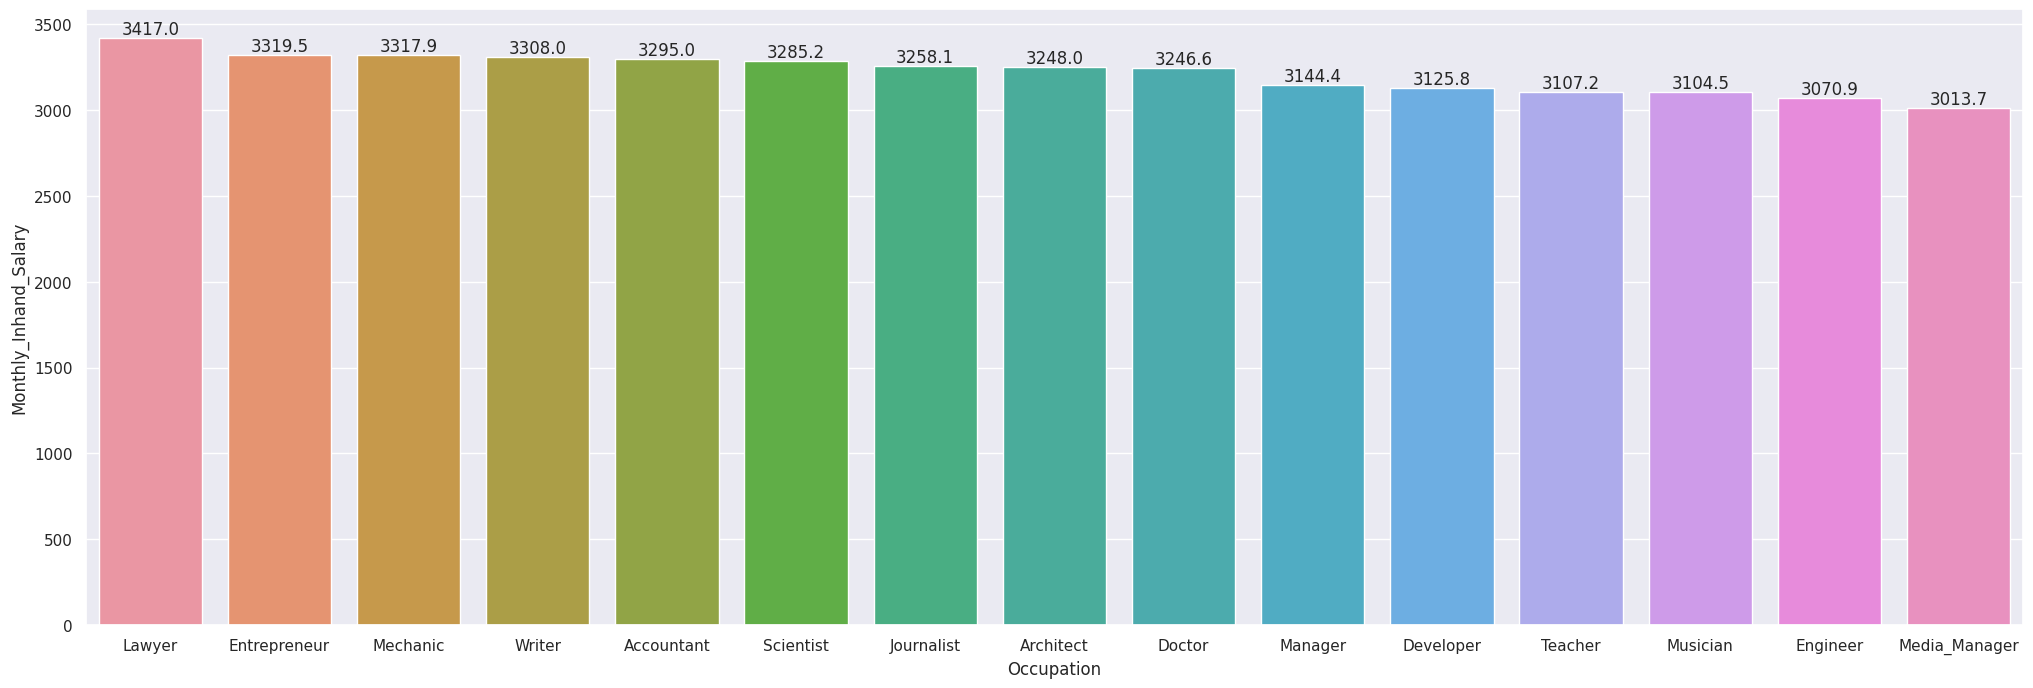

In [34]:
#Plotting the Monthly Inhand Salary by Occupation
fg = CreditData.groupby(['Occupation'])[['Monthly_Inhand_Salary']].mean().sort_values(by = 'Monthly_Inhand_Salary', ascending = False)

display(fg)
plt.figure(figsize = (25, 8))
fig = sns.barplot(x = fg.index, y = fg.Monthly_Inhand_Salary, ci = 0, estimator = 'sum')
fig.bar_label(fig.containers[0], fmt = '%.1f')

In [35]:
#Plotting Outstanding Debt for each month
fig = pe.histogram(data_frame = CreditData, x = CreditData['Month'], y = CreditData['Outstanding_Debt'], title = 'Outstanding Debt for each month', color = CreditData['Month'], height = 400)
fig.show()

In [36]:
#Convert New_Data to csv and save the data
CreditData.to_csv('Cleaned_Credit_Score.csv')
